# Plotting

In [1]:
import spatial_proteomics
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style='text')

In [2]:
ds = xr.load_dataset('../../data/BNHL_166_4_I2_LK.zarr')

/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


## Channel overlays

The slicing capabilities of `xarray` make data visualisation very easy. The general pattern is here to first select the channels, image regions and labels of interest, and then to use the plotting functions that are available via the `.pl` accessor. In the following we show some examples.

/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


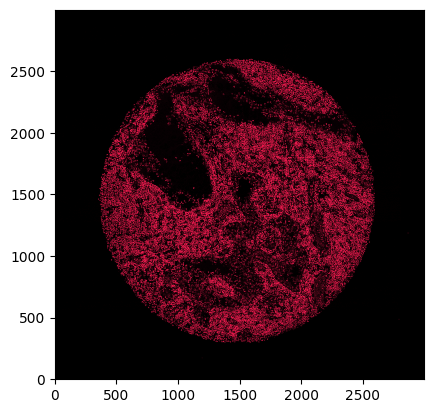

In [3]:
_ = ds.pp['DAPI'].pl.imshow()

If we want different colors, we can specify those using the `pl.colorize` method.

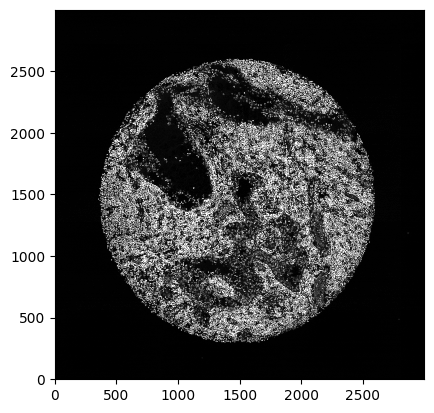

In [6]:
_ = ds.pp['DAPI'].pl.colorize(['white']).pl.imshow()

The `pl.colorize` function allows us to make image overlays quickly by first selecting the channels of interest. We illustrate this by first selecting the CD4 and CD8 channels and then assigning the colors `C2` (`matplotlib` color for green) and `C3` (red), respectively.

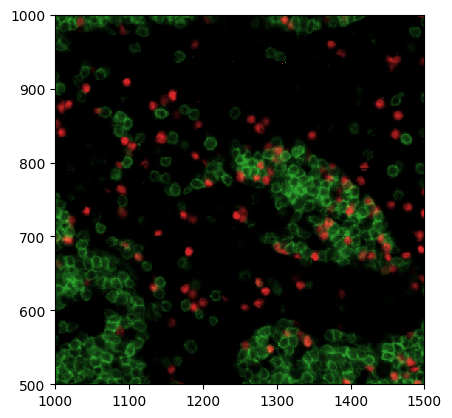

In [7]:
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['C2', 'C3']).pl.imshow()

All plotting functions accept `matplotlib.Axes` via the `ax` argument. This enables to easily modify plots using the normal `matplotlib` API.

Text(0.5, 0, 'X')

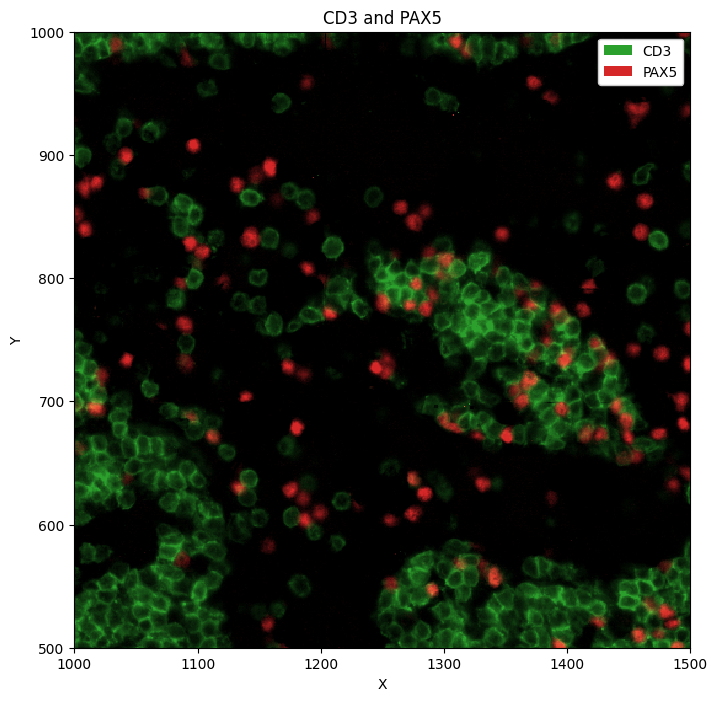

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['C2', 'C3']).pl.imshow(legend_background=True, ax=ax)
ax.set_title('CD3 and PAX5')
ax.set_ylabel('Y')
ax.set_xlabel('X')

## Rendering segmentation

Using the `pl.render_segmentation()` accessor we can visualize the segmentation.

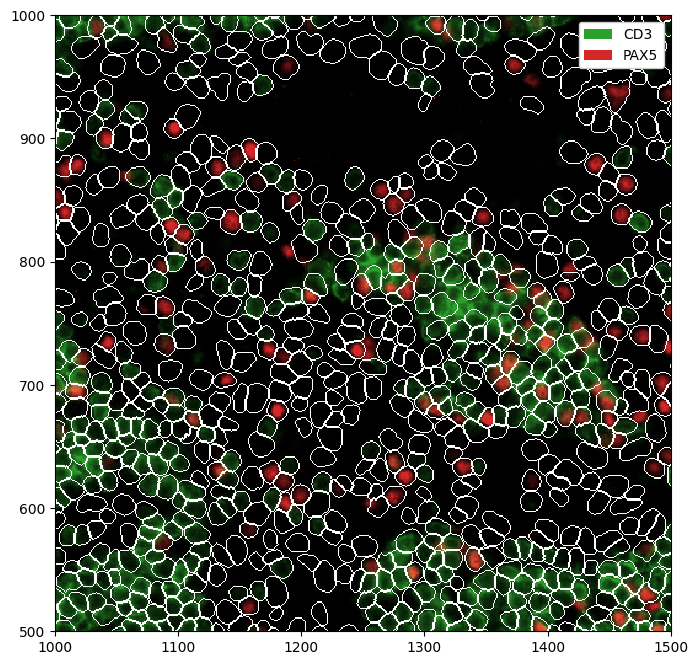

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
     .pl.colorize(colors=['C2', 'C3'])
     .pl.render_segmentation()
     .pl.imshow(legend_background=True, ax=ax)
    )

An easier syntax is to simple set `render_segmentation=True` in the `pl.imshow()` method.

/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


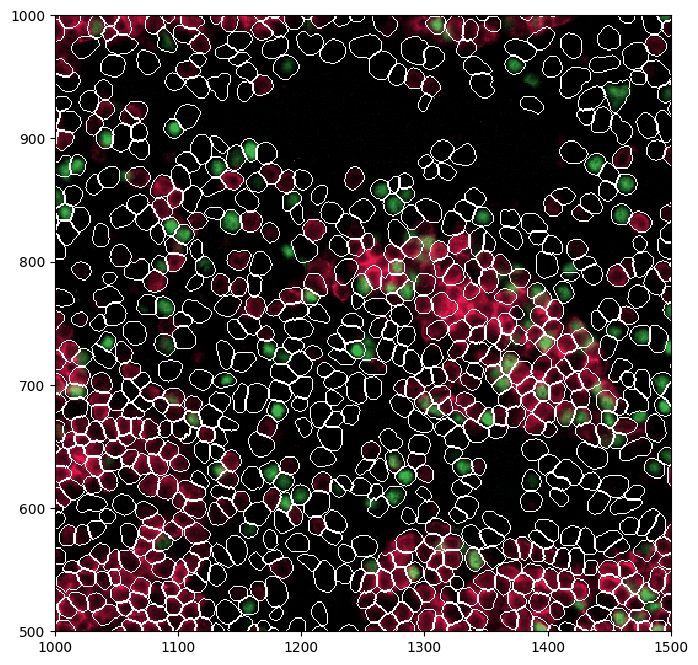

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
     .pl.imshow(render_segmentation=True, ax=ax)
    )

## Rendering labels

Using the `pl.render_labels()` accessor we can visualize the segmentation. The `pl.render_labels` accessor accepts the keyword arguments `alpha` and `alpha_boundary` which control the intensity of the displayed segmentation mask and the boundaries.

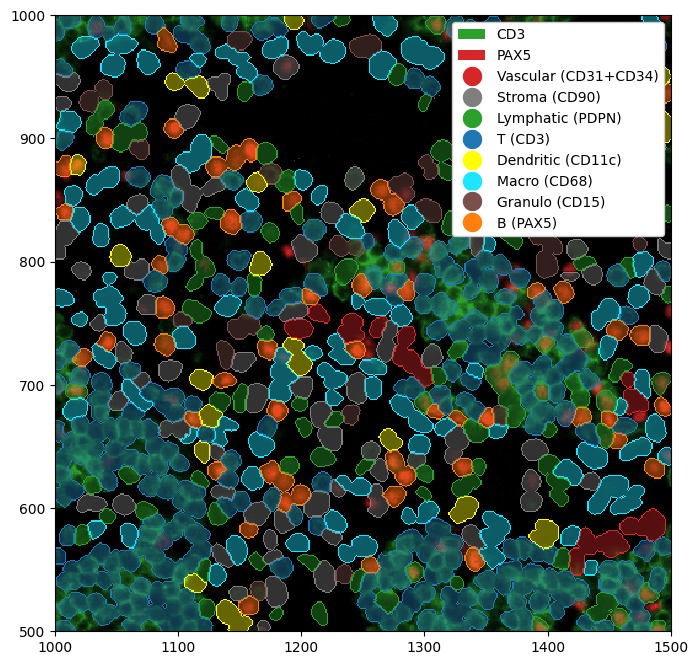

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
     .pl.colorize(colors=['C2', 'C3'])
     .pl.render_labels(alpha=.4, alpha_boundary=1)
     .pl.imshow(legend_background=True, legend_label=True, ax=ax)
    )

An easier syntax is to simply use `pl.imshow()` again. This enables you to plot labels and segmentation masks.

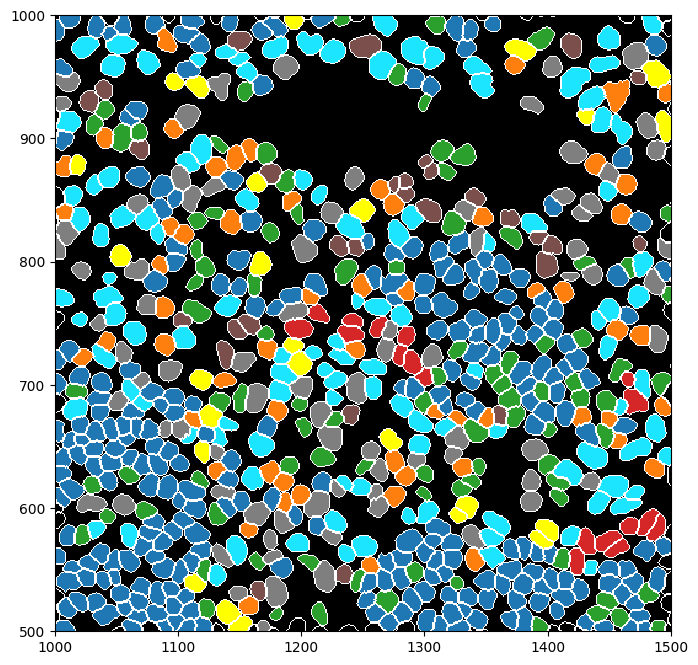

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
     .pl.imshow(render_intensities=False, render_segmentation=True, render_labels=True, ax=ax)
    )

You can also overlay them on top of the intensities while still retaining full control over the `render_labels` function.

/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


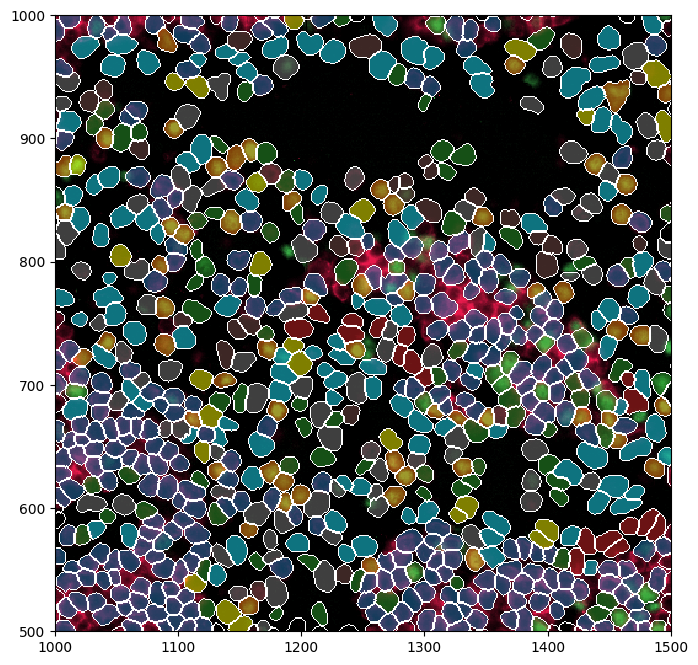

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
     .pl.imshow(render_intensities=True, render_segmentation=True, render_labels=True, label_kwargs={'alpha': 0.5}, ax=ax)
    )

Using the `.la[]` accessor we can also subset cell labels, rather than displaying all of them. Note that in the following plot, we also passed the `legend_label` argument which displays shown cell type labels.

NOTE: THIS CURRENTLY DOES NOT WORK WHEN ALSO SETTING `render_segmentation= True`.

/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


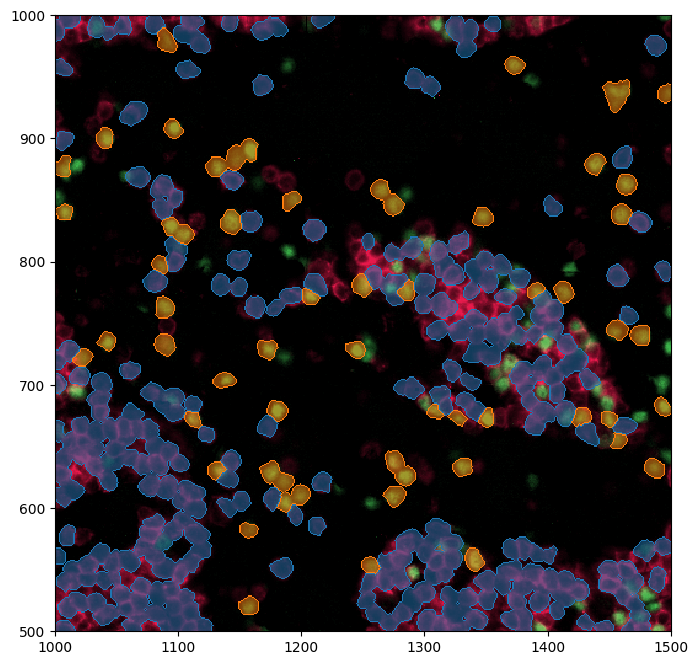

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
     .la['T (CD3)', 'B (PAX5)']
     .pl.imshow(render_labels=True, label_kwargs={'alpha': 0.5}, ax=ax)
    )

## Scatter plots

Rendering labels on the image might be to intense if the section to visualise is very large. In such cases we may want to fall back to a simple scatter plot.

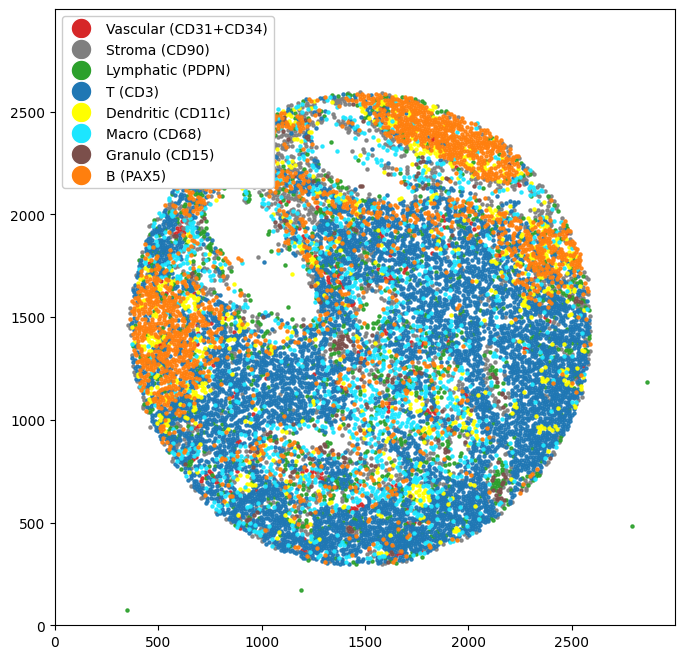

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = ds.pl.scatter(legend_label=True, ax=ax, size=5)

Note that we can also sub select cells to highlight certain celltypes using the `.la[]` accessor.

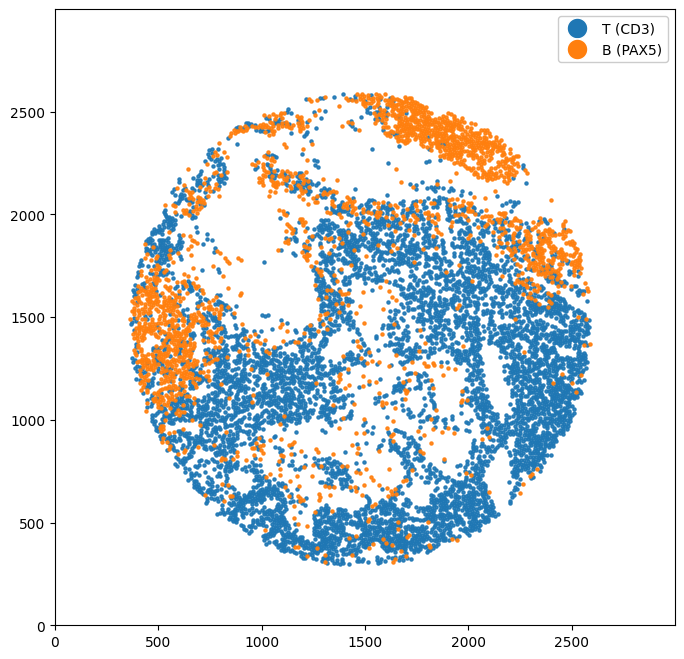

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = ds.la[['T (CD3)', 'B (PAX5)']].pl.scatter(legend_label=True, ax=ax, size=5)

## Annotating cells

We can also directly annotate cells on the plots.

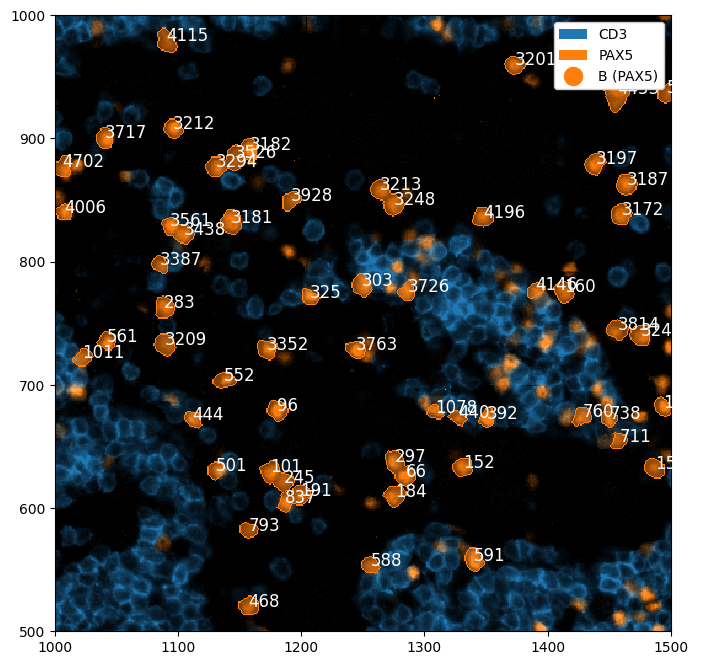

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
     .pl.colorize(colors=['C0', 'C1', 'C3'])
     .la['B (PAX5)']
     .pl.render_labels(alpha=0.5)
     .pl.imshow(legend_label=True, legend_background=True, ax=ax)
     .pl.annotate()
    )

This also works on scatter plots.

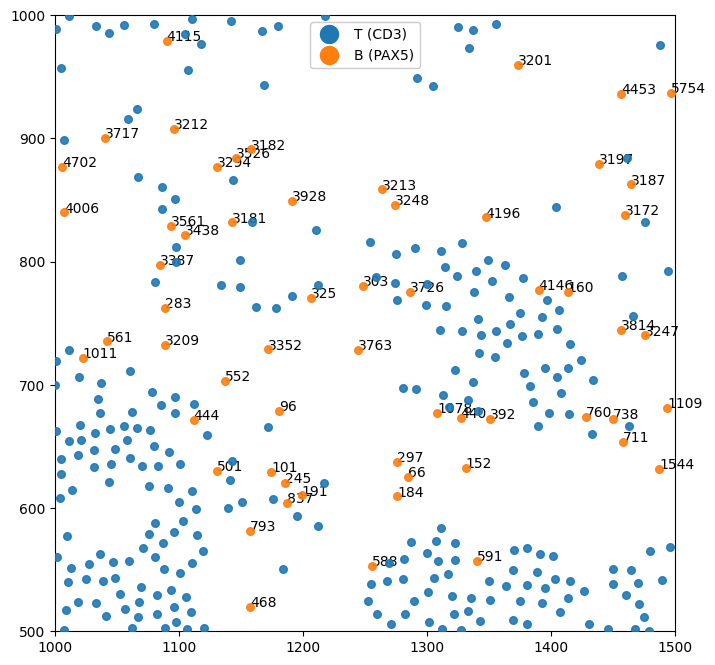

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = (ds
     .pp[1000:1500, 500:1000]
     .la['T (CD3)', 'B (PAX5)']
     .pl.scatter(legend_label=True, ax=ax, size=30)
     .la['B (PAX5)'] # only show annotation for cell type for
     .pl.annotate(text_kwargs=dict(color='black'))
    )